In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dask.dataframe as ddf
from pandas import Series, DataFrame
%matplotlib inline
import seaborn as sn
import plotly.express as px

### Lung Cancer Death Data

In [2]:
years = [year for year in range(2000, 2017)]
years

[2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016]

#### Individual level Lung Cancer Death data

In [3]:
data = []
for year in years:
    death_year =ddf.read_csv("/global/cfs/cdirs/m1532/Projects_MVP/geospatial/Lung_cancer/Lung_Cancer_Mortality/lung_cancer_mortality/lung_cancer_mortality_" + str(year) + ".csv", dtype={'fips': str, 'year': int, 'county_death': str, 'county_residence': str, 'state_residence': 'object', 'state_death': 'object'}).compute().drop(columns={'Unnamed: 0'})
    data.append(death_year)

In [4]:
death = pd.concat(data)
death

,year,county_residence,state_residence,state_death,county_death,month,sex,race,age,age_range,death_cause
0,2000,01021,01,01,01021,Jan,Female,White,55-64 years,age 25-64,lung cancer
1,2000,01121,01,01,01121,Jan,Female,White,65-74 years,65 and older,lung cancer
2,2000,01021,01,01,01021,Jan,Female,White,75-84 years,65 and older,lung cancer
3,2000,01025,01,01,01025,Jan,Male,White,75-84 years,65 and older,lung cancer
4,2000,01039,01,01,01039,Jan,Male,White,75-84 years,65 and older,lung cancer
...,...,...,...,...,...,...,...,...,...,...,...
149069,2016,36005,36,36,36005,Dec,Male,White,65-74 years,65 and older,lung cancer
149070,2016,36047,36,36,36047,Dec,Female,Black,55-64 years,age 25-64,lung cancer
149071,2016,36047,36,36,36047,Dec,Female,Black,45-54 years,age 25-64,lung cancer
149072,2016,36061,36,36,36005,Dec,Male,White,55-64 years,age 25-64,lung cancer


In [5]:
death['age'].unique()

array(['55-64 years', '65-74 years', '75-84 years', '85 years and over',
       '45-54 years', '25-34 years', '35-44 years', nan, '15-24 years',
       '5-14 years', '1-4 years', 'Under 1 year'], dtype=object)

### Population Data

#### Monthly population at county level

In [6]:
pop_data = []
for year in years:
    pop_year =ddf.read_csv("/global/cfs/cdirs/m1532/Projects_MVP/geospatial/temp_bins_suicide/Population/population_monthly/population_monthly_" + str(year) + ".csv", dtype={'fips': str, 'year': int}).compute().drop(columns={'Unnamed: 0'})
    pop_data.append(pop_year)

In [7]:
pop = pd.concat(pop_data)
pop

,year,fips,pop,month
0,2000,01001,39646,Jan
1,2000,01001,39758,Feb
2,2000,01001,39870,Mar
3,2000,01001,39982,Apr
4,2000,01001,40094,May
...,...,...,...,...
37699,2016,56045,6088,Aug
37700,2016,56045,6069,Sep
37701,2016,56045,6050,Oct
37702,2016,56045,6031,Nov


### Air Quality Data

In [8]:
air_quality =ddf.read_csv("/global/cfs/cdirs/m1532/Projects_MVP/geospatial/SatelliteImageProcess/air_quality_county_level/air_quality_county_level_*.csv", dtype={'fips': str, 'year': int}).compute().drop(columns={'Unnamed: 0'})
air_quality

,year,fips,state,month,month_name,date,pm25,ozone,no2,AQI
0,2000,01001,AL,1,Jan,2000-01-01,12.227921,0.035615,16.958351,51.269018
1,2000,01003,AL,1,Jan,2000-01-01,11.822614,0.034884,16.377989,49.260890
2,2000,01005,AL,1,Jan,2000-01-01,10.929928,0.035091,12.299659,45.541367
3,2000,01007,AL,1,Jan,2000-01-01,12.603236,0.035170,9.529918,52.058308
4,2000,01009,AL,1,Jan,2000-01-01,14.512665,0.034672,18.814536,56.073845
...,...,...,...,...,...,...,...,...,...,...
24072,2016,56037,WY,12,Dec,2016-12-31,3.189113,0.041455,0.405401,38.384720
24073,2016,56039,WY,12,Dec,2016-12-31,0.453900,0.041797,1.945122,38.700897
24074,2016,56041,WY,12,Dec,2016-12-31,4.624927,0.040823,0.748460,37.799350
24075,2016,56043,WY,12,Dec,2016-12-31,1.205741,0.040729,0.888502,37.712040


In [9]:
air_county_yearly = air_quality.drop(['state', 'month', 'month_name', 'date'], axis = 1)
air_county_yearly = air_county_yearly.groupby(['year', 'fips']).mean()
air_county_yearly = air_county_yearly.reset_index()
air_county_yearly

,year,fips,pm25,ozone,no2,AQI
0,2000,01001,17.533301,0.043600,15.392933,62.601136
1,2000,01003,13.566472,0.044790,19.748021,55.220764
2,2000,01005,15.311938,0.044848,11.185861,58.568098
3,2000,01007,17.390619,0.042250,11.095410,62.047892
4,2000,01009,17.967091,0.043877,15.909690,63.929598
...,...,...,...,...,...,...
52813,2016,56037,3.414709,0.044208,7.862863,40.782750
52814,2016,56039,2.888763,0.044049,3.707567,40.485135
52815,2016,56041,5.040875,0.045153,8.091328,41.543021
52816,2016,56043,2.659673,0.042149,3.306393,38.676903


In [154]:
air_county_yearly.to_csv('air_quality_county_level_2000_2016.csv')

In [10]:
air_yearly = air_county_yearly.drop('fips', axis = 1)
air_yearly = air_yearly.groupby('year').mean()
air_yearly = air_yearly.reset_index()
air_yearly

,year,pm25,ozone,no2,AQI
0,2000,11.332212,0.040698,16.990372,50.301269
1,2001,10.642355,0.040814,16.583109,48.504634
2,2002,10.553111,0.040462,15.473188,48.230321
3,2003,10.724979,0.040069,15.551110,48.016277
4,2004,10.206161,0.038777,14.269668,46.142448
5,2005,10.904164,0.040688,14.115240,48.774983
6,2006,9.971550,0.040923,12.920069,46.575039
7,2007,10.434572,0.040793,10.377755,47.175435
8,2008,9.174819,0.039794,11.620489,44.077114
9,2009,8.445930,0.038416,10.455305,41.963508


In [11]:
air_state_yearly = air_quality.drop(['month', 'month_name', 'date', 'fips'], axis = 1)
air_state_yearly = air_state_yearly.groupby(['year', 'state']).mean()
air_state_yearly = air_state_yearly.reset_index()
air_state_yearly

,year,state,pm25,ozone,no2,AQI
0,2000,AL,16.396679,0.043541,13.388673,60.282622
1,2000,AR,13.236599,0.041668,13.850948,53.462845
2,2000,AZ,6.035557,0.047743,29.746460,49.552098
3,2000,CA,8.669856,0.040957,21.750337,48.585794
4,2000,CO,4.667629,0.045124,17.393717,44.712190
...,...,...,...,...,...,...
828,2016,VT,4.319152,0.037928,10.401539,35.595412
829,2016,WA,3.879792,0.037656,10.627212,35.422577
830,2016,WI,6.226946,0.037479,11.272170,37.755955
831,2016,WV,6.247396,0.039657,6.374239,38.105874


In [156]:
air_state_yearly.to_csv('air_quality_state_level.csv')

In [12]:
air_state = air_state_yearly.drop('year', axis = 1)
air_state = air_state.groupby('state').mean()
air_state = air_state.reset_index()
air_state

,state,pm25,ozone,no2,AQI
0,AL,11.780145,0.039630,8.981315,47.891702
1,AR,10.553633,0.039862,10.024523,45.930903
2,AZ,5.134822,0.047129,19.080280,45.659307
3,CA,7.477856,0.041496,15.543455,45.354859
4,CO,4.504507,0.046382,19.497559,45.396495
5,CT,8.865373,0.038686,19.792388,43.562766
6,DC,11.975441,0.039636,31.275510,51.397585
7,DE,11.490503,0.040209,19.102178,49.693222
8,FL,8.513459,0.038308,13.033657,40.499160
9,GA,11.385162,0.040654,10.951291,47.684868


In [13]:
air_monthly = air_quality.drop(['year', 'fips', 'state', 'date', 'fips'], axis = 1)
air_monthly = air_monthly.groupby(['month', 'month_name']).mean()
air_monthly = air_monthly.reset_index()
air_monthly

,month,month_name,pm25,ozone,no2,AQI
0,1,Jan,8.568447,0.031011,15.651258,39.824565
1,2,Feb,9.237490,0.036183,15.469887,43.298291
2,3,Mar,8.904085,0.041989,13.737848,44.979607
3,4,Apr,8.251892,0.047057,11.972555,47.385357
4,5,May,8.946301,0.047094,10.888558,48.594997
5,6,Jun,10.351684,0.047070,10.529832,51.013759
6,7,Jul,11.556369,0.045878,10.199484,51.349073
7,8,Aug,11.350106,0.045484,10.733616,50.615970
8,9,Sep,9.495584,0.041779,11.309785,45.046645
9,10,Oct,7.894817,0.036124,12.586176,39.182517


#### Yearly population at county level

In [14]:
pop

,year,fips,pop,month
0,2000,01001,39646,Jan
1,2000,01001,39758,Feb
2,2000,01001,39870,Mar
3,2000,01001,39982,Apr
4,2000,01001,40094,May
...,...,...,...,...
37699,2016,56045,6088,Aug
37700,2016,56045,6069,Sep
37701,2016,56045,6050,Oct
37702,2016,56045,6031,Nov


### Read state code data

In [15]:
state = pd.read_excel('/global/cfs/cdirs/m1532/Projects_MVP/geospatial/temp_bins_suicide/test_paper/state_code.xlsx', engine='openpyxl', dtype = {'Code': int})
state

,Code,State,Abbreviation,Alpha code
0,1,Alabama,Ala.,AL
1,2,Alaska,NaN,AK
2,4,Arizona,Ariz.,AZ
3,5,Arkansas,Ark.,AR
4,6,California,Calif.,CA
5,8,Colorado,Colo.,CO
6,9,Connecticut,Conn.,CT
7,10,Delaware,Del.,DE
8,11,District of Columbia,D.C.,DC
9,12,Florida,Fla.,FL


In [16]:
def convertStateCode(code):
    return str(code).rjust(2, '0')

In [17]:
state['Code'] = state['Code'].apply(convertStateCode)
state = state.rename(columns = {'Code': 'statefips', 'State': 'state_name', 'Alpha code': 'state'})
state

,statefips,state_name,Abbreviation,state
0,01,Alabama,Ala.,AL
1,02,Alaska,NaN,AK
2,04,Arizona,Ariz.,AZ
3,05,Arkansas,Ark.,AR
4,06,California,Calif.,CA
5,08,Colorado,Colo.,CO
6,09,Connecticut,Conn.,CT
7,10,Delaware,Del.,DE
8,11,District of Columbia,D.C.,DC
9,12,Florida,Fla.,FL


In [18]:
def findState(code):
    return code[:2]

In [19]:
pop['statefips'] =  pop['fips'].apply(findState)
pop.head()

,year,fips,pop,month,statefips
0,2000,01001,39646,Jan,01
1,2000,01001,39758,Feb,01
2,2000,01001,39870,Mar,01
3,2000,01001,39982,Apr,01
4,2000,01001,40094,May,01


In [20]:
pop_state = pop.merge(state[['statefips', 'state_name', 'state']], on = ['statefips'], how = 'inner')
pop_state

,year,fips,pop,month,statefips,state_name,state
0,2000,01001,39646,Jan,01,Alabama,AL
1,2000,01001,39758,Feb,01,Alabama,AL
2,2000,01001,39870,Mar,01,Alabama,AL
3,2000,01001,39982,Apr,01,Alabama,AL
4,2000,01001,40094,May,01,Alabama,AL
...,...,...,...,...,...,...,...
640423,2016,15009,144370,Aug,15,Hawaii,HI
640424,2016,15009,143280,Sep,15,Hawaii,HI
640425,2016,15009,142189,Oct,15,Hawaii,HI
640426,2016,15009,141099,Nov,15,Hawaii,HI


In [21]:
pop_county_yearly = pop[pop['month'] == 'Dec']
pop_county_yearly = pop_county_yearly.drop(['month', 'statefips'], axis = 1)
pop_county_yearly

,year,fips,pop
11,2000,01001,40880
23,2000,01003,123900
35,2000,01005,26486
47,2000,01007,17222
59,2000,01009,45644
...,...,...,...
37655,2016,56037,41421
37667,2016,56039,22139
37679,2016,56041,19451
37691,2016,56043,7649


In [22]:
pop_yearly = pop_county_yearly.drop('fips', axis = 1)
pop_yearly = pop_yearly.groupby(['year']).sum()
pop_yearly = pop_yearly.reset_index()
pop_yearly

,year,pop
0,2000,255177896
1,2001,258689108
2,2002,260650782
3,2003,262750687
4,2004,266006601
5,2005,269091459
6,2006,270982202
7,2007,273146437
8,2008,275469943
9,2009,279702580


In [23]:
pop_state

,year,fips,pop,month,statefips,state_name,state
0,2000,01001,39646,Jan,01,Alabama,AL
1,2000,01001,39758,Feb,01,Alabama,AL
2,2000,01001,39870,Mar,01,Alabama,AL
3,2000,01001,39982,Apr,01,Alabama,AL
4,2000,01001,40094,May,01,Alabama,AL
...,...,...,...,...,...,...,...
640423,2016,15009,144370,Aug,15,Hawaii,HI
640424,2016,15009,143280,Sep,15,Hawaii,HI
640425,2016,15009,142189,Oct,15,Hawaii,HI
640426,2016,15009,141099,Nov,15,Hawaii,HI


In [24]:
pop_state_yearly = pop_state[pop_state['month'] == 'Dec']
pop_state_yearly = pop_state_yearly.drop(['month', 'fips'], axis = 1)
pop_state_yearly = pop_state_yearly.groupby(['year', 'statefips', 'state_name', 'state']).sum()
pop_state_yearly = pop_state_yearly.reset_index()
pop_state_yearly

,year,statefips,state_name,state,pop
0,2000,01,Alabama,AL,4024403
1,2000,02,Alaska,AK,589398
2,2000,04,Arizona,AZ,4572976
3,2000,05,Arkansas,AR,2436326
4,2000,06,California,CA,30431006
...,...,...,...,...,...
861,2016,51,Virginia,VA,7662911
862,2016,53,Washington,WA,6688132
863,2016,54,West Virginia,WV,1687211
864,2016,55,Wisconsin,WI,5219537


In [25]:
pop_by_state = pop_state_yearly.drop('year', axis = 1)
pop_by_state = pop_by_state.groupby(['statefips', 'state_name', 'state']).mean()
pop_by_state = pop_by_state.reset_index()
pop_by_state

,statefips,state_name,state,pop
0,01,Alabama,AL,4.261849e+06
1,02,Alaska,AK,6.253679e+05
2,04,Arizona,AZ,5.595868e+06
3,05,Arkansas,AR,2.582721e+06
4,06,California,CA,3.327546e+07
5,08,Colorado,CO,4.384391e+06
6,09,Connecticut,CT,3.205657e+06
7,10,Delaware,DE,7.912552e+05
8,11,District of Columbia,DC,5.558279e+05
9,12,Florida,FL,1.668235e+07


In [26]:
import math
def roundPopulation(p):
    return round(p)

In [76]:
pop_state

,year,fips,pop,month,statefips,state_name,state
0,2000,01001,39646,Jan,01,Alabama,AL
1,2000,01001,39758,Feb,01,Alabama,AL
2,2000,01001,39870,Mar,01,Alabama,AL
3,2000,01001,39982,Apr,01,Alabama,AL
4,2000,01001,40094,May,01,Alabama,AL
...,...,...,...,...,...,...,...
640423,2016,15009,144370,Aug,15,Hawaii,HI
640424,2016,15009,143280,Sep,15,Hawaii,HI
640425,2016,15009,142189,Oct,15,Hawaii,HI
640426,2016,15009,141099,Nov,15,Hawaii,HI


In [77]:
pop_by_month = pop_state.drop(['fips', 'statefips', 'state_name', 'state'], axis = 1)
pop_by_month = pop_by_month.groupby(['year', 'month']).sum()
pop_by_month = pop_by_month.reset_index()
pop_by_month = pop_by_month.drop('year', axis = 1)
pop_by_month = pop_by_month.groupby(['month']).mean()
pop_by_month = pop_by_month.reset_index()
pop_by_month['pop'] = pop_by_month['pop'].apply(roundPopulation)
pop_by_month

,month,pop
0,Apr,274029721
1,Aug,274794974
2,Dec,275561270
3,Feb,273646835
4,Jan,273455380
5,Jul,274603274
6,Jun,274412606
7,Mar,273838275
8,May,274220632
9,Nov,275368526


### Lung Cancer Mortality Rate from 2000 to 2016
### The death are calculated by county of death

In [28]:
death

,year,county_residence,state_residence,state_death,county_death,month,sex,race,age,age_range,death_cause
0,2000,01021,01,01,01021,Jan,Female,White,55-64 years,age 25-64,lung cancer
1,2000,01121,01,01,01121,Jan,Female,White,65-74 years,65 and older,lung cancer
2,2000,01021,01,01,01021,Jan,Female,White,75-84 years,65 and older,lung cancer
3,2000,01025,01,01,01025,Jan,Male,White,75-84 years,65 and older,lung cancer
4,2000,01039,01,01,01039,Jan,Male,White,75-84 years,65 and older,lung cancer
...,...,...,...,...,...,...,...,...,...,...,...
149069,2016,36005,36,36,36005,Dec,Male,White,65-74 years,65 and older,lung cancer
149070,2016,36047,36,36,36047,Dec,Female,Black,55-64 years,age 25-64,lung cancer
149071,2016,36047,36,36,36047,Dec,Female,Black,45-54 years,age 25-64,lung cancer
149072,2016,36061,36,36,36005,Dec,Male,White,55-64 years,age 25-64,lung cancer


In [29]:
death = death[death['county_death'] != '00nan']
death_total = death.drop(['county_residence', 'state_residence', 'sex', 'race', 'age', 'age_range'], axis = 1)
death_state_yearly = death_total.groupby(['year', 'county_death', 'state_death', 'month']).count()
death_state_yearly = death_state_yearly.reset_index()
death_state_yearly = death_state_yearly.rename(columns = {'death_cause': 'deaths'})
death_state_yearly

,year,county_death,state_death,month,deaths
0,2000,01001,01,Apr,1
1,2000,01001,01,Aug,1
2,2000,01001,01,Dec,1
3,2000,01001,01,Feb,1
4,2000,01001,01,Jan,1
...,...,...,...,...,...
402714,2016,56041,56,Aug,1
402715,2016,56041,56,Feb,1
402716,2016,56041,56,Jun,1
402717,2016,56043,56,Jul,1


In [30]:
death_state_yearly = death_state_yearly.rename(columns = {'county_death': 'fips', 'state_death': 'statefips'})
death_state_yearly.head()

,year,fips,statefips,month,deaths
0,2000,01001,01,Apr,1
1,2000,01001,01,Aug,1
2,2000,01001,01,Dec,1
3,2000,01001,01,Feb,1
4,2000,01001,01,Jan,1


In [33]:
death_county_by_year = death_state_yearly.groupby(['year', 'fips', 'statefips']).sum()
death_county_by_year = death_county_by_year.reset_index()
death_county_by_year.head()

,year,fips,statefips,deaths
0,2000,01001,01,14
1,2000,01003,01,92
2,2000,01005,01,20
3,2000,01007,01,12
4,2000,01009,01,23


In [34]:
death_state_by_year = death_county_by_year.drop(['fips'], axis = 1)
death_state_by_year = death_state_by_year.groupby(['year', 'statefips']).sum()
death_state_by_year = death_state_by_year.reset_index()
death_state_by_year.head()

,year,statefips,deaths
0,2000,01,2899
1,2000,04,2578
2,2000,05,1946
3,2000,06,13749
4,2000,08,1434


In [36]:
death_by_state = death_state_by_year.drop(['year'], axis = 1)
death_by_state = death_by_state.groupby(['statefips']).mean()
death_by_state = death_by_state.reset_index()
death_by_state['deaths'] = death_by_state['deaths'].apply(roundPopulation)
death_by_state.head()

,statefips,deaths
0,01,3030
1,02,234
2,04,2723
3,05,2072
4,06,13085


In [39]:
death_by_year = death_state_by_year.drop(['statefips'], axis = 1)
death_by_year = death_by_year.groupby(['year']).sum()
death_by_year = death_by_year.reset_index()
death_by_year.head()

,year,deaths
0,2000,152297
1,2001,152821
2,2002,154528
3,2003,158198
4,2004,158190


In [41]:
death_month_by_year = death_state_yearly.drop(['statefips', 'fips'], axis = 1)
death_month_by_year = death_month_by_year.groupby(['year', 'month']).sum()
death_month_by_year = death_month_by_year.reset_index()
death_month_by_year.head()

,year,month,deaths
0,2000,Apr,12166
1,2000,Aug,12842
2,2000,Dec,13203
3,2000,Feb,12060
4,2000,Jan,13343


In [43]:
death_by_month = death_month_by_year.drop('year', axis =1)
death_by_month = death_by_month.groupby(['month']).mean()
death_by_month['deaths'] = death_by_month['deaths'].apply(roundPopulation)
death_by_month = death_by_month.reset_index()
death_by_month.head()

,month,deaths
0,Apr,12775
1,Aug,13075
2,Dec,13470
3,Feb,12376
4,Jan,13626


### Calculate Lung Cancer Mortality Rate in different levels

In [44]:
pop_county_yearly

,year,fips,pop
11,2000,01001,40880
23,2000,01003,123900
35,2000,01005,26486
47,2000,01007,17222
59,2000,01009,45644
...,...,...,...
37655,2016,56037,41421
37667,2016,56039,22139
37679,2016,56041,19451
37691,2016,56043,7649


In [45]:
death_county_by_year

,year,fips,statefips,deaths
0,2000,01001,01,14
1,2000,01003,01,92
2,2000,01005,01,20
3,2000,01007,01,12
4,2000,01009,01,23
...,...,...,...,...
50785,2016,56037,56,8
50786,2016,56039,56,1
50787,2016,56041,56,3
50788,2016,56043,56,1


In [47]:
rate_county_by_year = death_county_by_year.merge(pop_county_yearly, on = ['year', 'fips'], how = 'inner')
rate_county_by_year['lung_cancer_mortality_rate'] = (rate_county_by_year['deaths'] / rate_county_by_year['pop']) * 100000
rate_county_by_year

,year,fips,statefips,deaths,pop,lung_cancer_mortality_rate
0,2000,01001,01,14,40880,34.246575
1,2000,01003,01,92,123900,74.253430
2,2000,01005,01,20,26486,75.511591
3,2000,01007,01,12,17222,69.678318
4,2000,01009,01,23,45644,50.389975
...,...,...,...,...,...,...
50730,2016,56037,56,8,41421,19.313875
50731,2016,56039,56,1,22139,4.516916
50732,2016,56041,56,3,19451,15.423372
50733,2016,56043,56,1,7649,13.073604


In [152]:
rate_county_by_year.to_csv('lung_cancer_mortality_rate_county_level_2000_2016.csv')

In [48]:
air_county_yearly

,year,fips,pm25,ozone,no2,AQI
0,2000,01001,17.533301,0.043600,15.392933,62.601136
1,2000,01003,13.566472,0.044790,19.748021,55.220764
2,2000,01005,15.311938,0.044848,11.185861,58.568098
3,2000,01007,17.390619,0.042250,11.095410,62.047892
4,2000,01009,17.967091,0.043877,15.909690,63.929598
...,...,...,...,...,...,...
52813,2016,56037,3.414709,0.044208,7.862863,40.782750
52814,2016,56039,2.888763,0.044049,3.707567,40.485135
52815,2016,56041,5.040875,0.045153,8.091328,41.543021
52816,2016,56043,2.659673,0.042149,3.306393,38.676903


In [49]:
air_rate_county_year = rate_county_by_year.merge(air_county_yearly, on = ['year', 'fips'], how = 'inner')
air_rate_county_year.head()

,year,fips,statefips,deaths,pop,lung_cancer_mortality_rate,pm25,ozone,no2,AQI
0,2000,01001,01,14,40880,34.246575,17.533301,0.043600,15.392933,62.601136
1,2000,01003,01,92,123900,74.253430,13.566472,0.044790,19.748021,55.220764
2,2000,01005,01,20,26486,75.511591,15.311938,0.044848,11.185861,58.568098
3,2000,01007,01,12,17222,69.678318,17.390619,0.042250,11.095410,62.047892
4,2000,01009,01,23,45644,50.389975,17.967091,0.043877,15.909690,63.929598


In [51]:
air_rate_county_year = air_rate_county_year.merge(state[['statefips', 'state_name', 'state']], on = 'statefips', how = 'inner')
air_rate_county_year.head()

,year,fips,statefips,deaths,pop,lung_cancer_mortality_rate,pm25,ozone,no2,AQI,state_name,state
0,2000,01001,01,14,40880,34.246575,17.533301,0.043600,15.392933,62.601136,Alabama,AL
1,2000,01003,01,92,123900,74.253430,13.566472,0.044790,19.748021,55.220764,Alabama,AL
2,2000,01005,01,20,26486,75.511591,15.311938,0.044848,11.185861,58.568098,Alabama,AL
3,2000,01007,01,12,17222,69.678318,17.390619,0.042250,11.095410,62.047892,Alabama,AL
4,2000,01009,01,23,45644,50.389975,17.967091,0.043877,15.909690,63.929598,Alabama,AL


#### Save this dataframe to create county level/state level maps and use linear regression model or pairwise correlation methods to check their correlations

In [52]:
air_rate_county_year.to_csv('air_quality_and_lung_cancer_county_level_2000_2016.csv')

### Check trends first

In [55]:
air_rate_yearly = death_by_year.merge(pop_yearly, on = ['year'], how = 'inner')
air_rate_yearly['lung_cancer_mortality_rate'] = (air_rate_yearly['deaths'] / air_rate_yearly['pop']) * 100000
air_rate_yearly = air_rate_yearly.merge(air_yearly, on = ['year'], how = 'inner')
air_rate_yearly

,year,deaths,pop,lung_cancer_mortality_rate,pm25,ozone,no2,AQI
0,2000,152297,255177896,59.682677,11.332212,0.040698,16.990372,50.301269
1,2001,152821,258689108,59.075158,10.642355,0.040814,16.583109,48.504634
2,2002,154528,260650782,59.285454,10.553111,0.040462,15.473188,48.230321
3,2003,158198,262750687,60.208406,10.724979,0.040069,15.551110,48.016277
4,2004,158190,266006601,59.468449,10.206161,0.038777,14.269668,46.142448
5,2005,159405,269091459,59.238224,10.904164,0.040688,14.115240,48.774983
6,2006,158786,270982202,58.596468,9.971550,0.040923,12.920069,46.575039
7,2007,158889,273146437,58.169897,10.434572,0.040793,10.377755,47.175435
8,2008,158808,275469943,57.649847,9.174819,0.039794,11.620489,44.077114
9,2009,158269,279702580,56.584748,8.445930,0.038416,10.455305,41.963508


In [56]:
def normalizeColumn(df, column_name):
    df[column_name + '_normalized'] = ((df[column_name] - min(df[column_name]))/(max(df[column_name]) - min(df[column_name]))) * 100
    return df

In [58]:
air_rate_normalized = normalizeColumn(air_rate_yearly, 'lung_cancer_mortality_rate')
air_rate_normalized = normalizeColumn(air_rate_normalized, 'pm25')
air_rate_normalized = normalizeColumn(air_rate_normalized, 'ozone')
air_rate_normalized = normalizeColumn(air_rate_normalized, 'no2')
air_rate_normalized = normalizeColumn(air_rate_normalized, 'AQI')
air_rate_normalized

,year,deaths,pop,lung_cancer_mortality_rate,pm25,ozone,no2,AQI,lung_cancer_mortality_rate_normalized,pm25_normalized,ozone_normalized,no2_normalized,AQI_normalized
0,2000,152297,255177896,59.682677,11.332212,0.040698,16.990372,50.301269,94.342870,100.000000,89.939921,100.000000,100.000000
1,2001,152821,258689108,59.075158,10.642355,0.040814,16.583109,48.504634,87.805630,85.413367,94.521539,94.630199,83.559999
2,2002,154528,260650782,59.285454,10.553111,0.040462,15.473188,48.230321,90.068531,83.526353,80.616159,79.995793,81.049907
3,2003,158198,262750687,60.208406,10.724979,0.040069,15.551110,48.016277,100.000000,87.160411,65.140649,81.023192,79.091315
4,2004,158190,266006601,59.468449,10.206161,0.038777,14.269668,46.142448,92.037656,76.190299,14.238514,64.127264,61.944951
5,2005,159405,269091459,59.238224,10.904164,0.040688,14.115240,48.774983,89.560303,90.949158,89.540996,62.091120,86.033809
6,2006,158786,270982202,58.596468,9.971550,0.040923,12.920069,46.575039,82.654662,71.229594,98.803575,46.332671,65.903345
7,2007,158889,273146437,58.169897,10.434572,0.040793,10.377755,47.175435,78.064515,81.019920,93.691328,12.812026,71.397239
8,2008,158808,275469943,57.649847,9.174819,0.039794,11.620489,44.077114,72.468491,54.383169,54.301767,29.197596,43.046226
9,2009,158269,279702580,56.584748,8.445930,0.038416,10.455305,41.963508,61.007441,38.971251,0.000000,13.834532,23.705792


In [61]:
import pandas as pd
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool, ColumnDataSource

# Import your dataset and convert to a DataFrame (replace 'your_dataframe' with your actual dataframe)
df = air_rate_normalized

source = ColumnDataSource(df)

# Call once to configure Bokeh to display plots inline in the notebook
output_notebook()

# Create a new plot with a title and axis labels
p = figure(title="Yearly trend of air quality and lung cancer from 2000 to 2016", x_axis_label='year', y_axis_label='value', x_range=(2000, 2016))

# Add a line renderer for each suicide rates
p.line('year', 'lung_cancer_mortality_rate', source=source, line_width=4, line_color="red", legend_label="Lung Cancer Mortality")
p.line('year', 'pm25', source=source, line_width=2, line_color="orange", legend_label="PM2.5")
p.line('year', 'ozone', source=source, line_width=2, line_color="blue", legend_label="Ozone")
p.line('year', 'no2', source=source, line_width=2, line_color="green", legend_label="NO2")
p.line('year', 'AQI', source=source, line_width=2, line_color="black", legend_label="AQI")

# Add HoverTool
hover = HoverTool(
    tooltips=[
        ("year", "@year"),
        ("lung_cancer_mortality_rate", "@{lung_cancer_mortality_rate}"),
        ("pm25", "@{pm25}"),
        ("ozone", "@{ozone}"),
        ("no2", "@{no2}"),
        ("AQI", "@{AQI}")
    ]
)

#p.add_tools(hover)
p.legend.location = "top_right"
p.y_range.start = 0
p.y_range.end = 80
# Show the result
show(p)

Loading BokehJS ...

In [63]:
# Import your dataset and convert to a DataFrame (replace 'your_dataframe' with your actual dataframe)
df = air_rate_normalized

source = ColumnDataSource(df)

# Call once to configure Bokeh to display plots inline in the notebook
output_notebook()

# Create a new plot with a title and axis labels
p = figure(title="Yearly trend of air quality and lung cancer from 2000 to 2016 (normalized)", x_axis_label='year', y_axis_label='value', x_range=(2000, 2016))

# Add a line renderer for each suicide rates
p.line('year', 'lung_cancer_mortality_rate_normalized', source=source, line_width=4, line_color="red", legend_label="Lung Cancer Mortality")
p.line('year', 'pm25_normalized', source=source, line_width=2, line_color="orange", legend_label="PM2.5")
p.line('year', 'ozone_normalized', source=source, line_width=2, line_color="blue", legend_label="Ozone")
p.line('year', 'no2_normalized', source=source, line_width=2, line_color="green", legend_label="NO2")
p.line('year', 'AQI_normalized', source=source, line_width=2, line_color="black", legend_label="AQI")

# Add HoverTool
hover = HoverTool(
    tooltips=[
        ("year", "@year"),
        ("lung_cancer_mortality_rate_normalized", "@{lung_cancer_mortality_rate_normalized}"),
        ("pm25_normalized", "@{pm25_normalized}"),
        ("ozone_normalized", "@{ozone_normalized}"),
        ("no2_normalized", "@{no2_normalized}"),
        ("AQI_normalized", "@{AQI_normalized}")
    ]
)

#p.add_tools(hover)
p.legend.location = "top_right"
p.y_range.start = 0
p.y_range.end = 150
# Show the result
show(p)

Loading BokehJS ...

### Check Monthly Trends

In [78]:
death_by_month = death_by_month.rename(columns = {'month': 'month_name'})
pop_by_month = pop_by_month.rename(columns = {'month': 'month_name'})

In [79]:
air_rate_by_month = death_by_month.merge(pop_by_month, on = ['month_name'], how = 'inner')
air_rate_by_month['lung_cancer_mortality_rate'] = (air_rate_by_month['deaths'] / air_rate_by_month['pop']) * 100000
air_rate_by_month = air_rate_by_month.merge(air_monthly, on = ['month_name'], how = 'inner')
air_rate_by_month

,month_name,deaths,pop,lung_cancer_mortality_rate,month,pm25,ozone,no2,AQI
0,Apr,12775,274029721,4.661903,4,8.251892,0.047057,11.972555,47.385357
1,Aug,13075,274794974,4.758093,8,11.350106,0.045484,10.733616,50.615970
2,Dec,13470,275561270,4.888205,12,8.308231,0.029127,14.635174,38.390995
3,Feb,12376,273646835,4.522618,2,9.237490,0.036183,15.469887,43.298291
4,Jan,13626,273455380,4.982897,1,8.568447,0.031011,15.651258,39.824565
5,Jul,12979,274603274,4.726455,7,11.556369,0.045878,10.199484,51.349073
6,Jun,12603,274412606,4.592719,6,10.351684,0.047070,10.529832,51.013759
7,Mar,13454,273838275,4.913119,3,8.904085,0.041989,13.737848,44.979607
8,May,13105,274220632,4.778999,5,8.946301,0.047094,10.888558,48.594997
9,Nov,12883,275368526,4.678458,11,8.294520,0.032160,14.046908,38.897643


In [80]:
air_rate_by_month = air_rate_by_month.sort_values(['month'])
air_rate_by_month

,month_name,deaths,pop,lung_cancer_mortality_rate,month,pm25,ozone,no2,AQI
4,Jan,13626,273455380,4.982897,1,8.568447,0.031011,15.651258,39.824565
3,Feb,12376,273646835,4.522618,2,9.237490,0.036183,15.469887,43.298291
7,Mar,13454,273838275,4.913119,3,8.904085,0.041989,13.737848,44.979607
0,Apr,12775,274029721,4.661903,4,8.251892,0.047057,11.972555,47.385357
8,May,13105,274220632,4.778999,5,8.946301,0.047094,10.888558,48.594997
6,Jun,12603,274412606,4.592719,6,10.351684,0.047070,10.529832,51.013759
5,Jul,12979,274603274,4.726455,7,11.556369,0.045878,10.199484,51.349073
1,Aug,13075,274794974,4.758093,8,11.350106,0.045484,10.733616,50.615970
11,Sep,12744,274986157,4.634415,9,9.495584,0.041779,11.309785,45.046645
10,Oct,13296,275177336,4.831793,10,7.894817,0.036124,12.586176,39.182517


In [83]:
# Import your dataset and convert to a DataFrame (replace 'your_dataframe' with your actual dataframe)
import pandas as pd
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool, ColumnDataSource

# Import your dataset and convert to a DataFrame (replace 'your_dataframe' with your actual dataframe)
df = air_rate_by_month

source = ColumnDataSource(df)

# Call once to configure Bokeh to display plots inline in the notebook
output_notebook()

# Create a new plot with a title and axis labels
p = figure(x_range=df['month_name'], plot_height=400, title="Monthly Trend of Air Quality and Lung Cancer from 2000 to 2016",
           toolbar_location=None, tools="hover", tooltips="$name: @$name", x_axis_label='month', y_axis_label='value')

# Add a line renderer for each suicide rates
p.line('month_name', 'lung_cancer_mortality_rate', source=source, line_width=4, line_color="red", legend_label="lung cancer mortality rates")
p.line('month_name', 'pm25', source=source, line_width=2, line_color="orange", legend_label="PM2.5")
p.line('month_name', 'ozone', source=source, line_width=2, line_color="blue", legend_label="Ozone")
p.line('month_name', 'no2', source=source, line_width=2, line_color="green", legend_label="NO2")
p.line('month_name', 'AQI', source=source, line_width=4, line_color="black", legend_label="AQI")

# Set some properties
p.xgrid.grid_line_color = None
p.y_range.start = 0
p.y_range.end = 80
p.legend.location = "top_left"
p.legend.orientation = "vertical"
p.legend.margin = 5  # Add some margin around the legend
p.legend.padding = 5  # Add some padding around the items in the legend
# Show the result
show(p)

Loading BokehJS ...

In [84]:
air_rate_by_month_normalized = normalizeColumn(air_rate_by_month, 'lung_cancer_mortality_rate')
air_rate_by_month_normalized = normalizeColumn(air_rate_by_month_normalized, 'pm25')
air_rate_by_month_normalized = normalizeColumn(air_rate_by_month_normalized, 'ozone')
air_rate_by_month_normalized = normalizeColumn(air_rate_by_month_normalized, 'no2')
air_rate_by_month_normalized = normalizeColumn(air_rate_by_month_normalized, 'AQI')
air_rate_by_month_normalized

,month_name,deaths,pop,lung_cancer_mortality_rate,month,pm25,ozone,no2,AQI,lung_cancer_mortality_rate_normalized,pm25_normalized,ozone_normalized,no2_normalized,AQI_normalized
4,Jan,13626,273455380,4.982897,1,8.568447,0.031011,15.651258,39.824565,100.000000,18.397383,10.488009,100.000000,11.063141
3,Feb,12376,273646835,4.522618,2,9.237490,0.036183,15.469887,43.298291,0.000000,36.669495,39.272870,96.673168,37.870553
7,Mar,13454,273838275,4.913119,3,8.904085,0.041989,13.737848,44.979607,84.840046,27.563950,71.584863,64.902975,50.845596
0,Apr,12775,274029721,4.661903,4,8.251892,0.047057,11.972555,47.385357,30.261065,9.752026,99.792890,32.522826,69.411237
8,May,13105,274220632,4.778999,5,8.946301,0.047094,10.888558,48.594997,55.701149,28.716899,100.000000,12.639447,78.746257
6,Jun,12603,274412606,4.592719,6,10.351684,0.047070,10.529832,51.013759,15.230186,67.099058,99.867457,6.059456,97.412316
5,Jul,12979,274603274,4.726455,7,11.556369,0.045878,10.199484,51.349073,44.285560,100.000000,93.229436,0.000000,100.000000
1,Aug,13075,274794974,4.758093,8,11.350106,0.045484,10.733616,50.615970,51.159191,94.366772,91.040036,9.797393,94.342498
11,Sep,12744,274986157,4.634415,9,9.495584,0.041779,11.309785,45.046645,24.289047,43.718267,70.419875,20.365866,51.362941
10,Oct,13296,275177336,4.831793,10,7.894817,0.036124,12.586176,39.182517,67.171297,0.000000,38.943034,43.778253,6.108327


In [86]:
# Import your dataset and convert to a DataFrame (replace 'your_dataframe' with your actual dataframe)
df = air_rate_by_month_normalized

source = ColumnDataSource(df)

# Call once to configure Bokeh to display plots inline in the notebook
output_notebook()

# Create a new plot with a title and axis labels
p = figure(x_range=df['month_name'], plot_height=400, title="Monthly Trend of Air Quality and Lung Cancer from 2000 to 2016 (Normalized)",
           toolbar_location=None, tools="hover", tooltips="$name: @$name", x_axis_label='month', y_axis_label='value')

# Add a line renderer for each suicide rates
p.line('month_name', 'lung_cancer_mortality_rate_normalized', source=source, line_width=4, line_color="red", legend_label="lung cancer mortality rates")
p.line('month_name', 'pm25_normalized', source=source, line_width=2, line_color="orange", legend_label="PM2.5")
p.line('month_name', 'ozone_normalized', source=source, line_width=2, line_color="blue", legend_label="Ozone")
p.line('month_name', 'no2_normalized', source=source, line_width=2, line_color="green", legend_label="NO2")
p.line('month_name', 'AQI_normalized', source=source, line_width=4, line_color="black", legend_label="AQI")

# Set some properties
p.xgrid.grid_line_color = None
p.y_range.start = 0
p.y_range.end = 180
p.legend.location = "top_left"
p.legend.orientation = "vertical"
p.legend.margin = 5  # Add some margin around the legend
p.legend.padding = 5  # Add some padding around the items in the legend
# Show the result
show(p)

Loading BokehJS ...

### Find the the top ten states

In [90]:
air_rate_state = air_rate_county_year.drop(['fips', 'year', 'deaths', 'pop', 'statefips', 'state'], axis = 1)
air_rate_by_state = air_rate_state.groupby(['state_name']).mean()
air_rate_by_state = air_rate_by_state.reset_index()

In [92]:
air_rate_by_state.head()

,state_name,lung_cancer_mortality_rate,pm25,ozone,no2,AQI
0,Alabama,64.384245,11.774012,0.039625,8.976882,47.874857
1,Arizona,47.083484,5.140138,0.047122,19.066726,45.661119
2,Arkansas,73.462640,10.553431,0.039863,10.018411,45.935913
3,California,48.875462,7.570040,0.041379,15.693662,45.363418
4,Colorado,41.030507,4.643145,0.046200,20.072693,45.277173


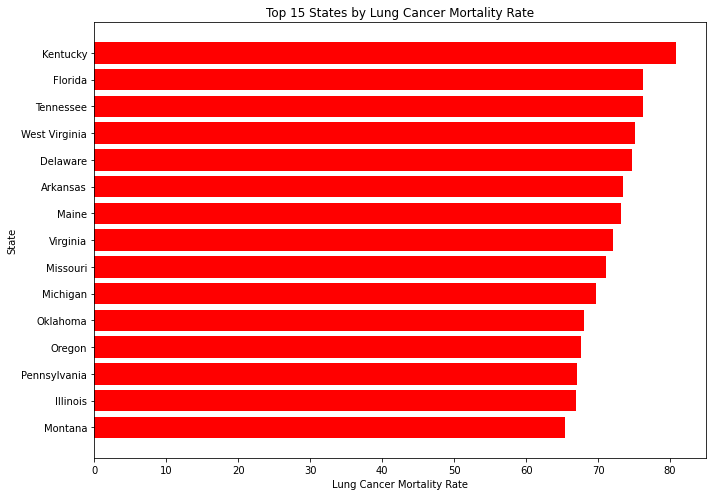

In [101]:
# Sorting by 'Lung cancer Mortality' in descending order and selecting the top 10
top_states = air_rate_by_state.sort_values(by='lung_cancer_mortality_rate', ascending=False).head(15)

# Plotting the horizontal bar graph
plt.figure(figsize=(10, 7))
plt.barh(top_states['state_name'], top_states['lung_cancer_mortality_rate'], color='red')
plt.ylabel('State')
plt.xlabel('Lung Cancer Mortality Rate')
plt.title('Top 15 States by Lung Cancer Mortality Rate')
plt.tight_layout()
plt.gca().invert_yaxis()  # This will make the state with the highest mortality appear at the top
plt.show()

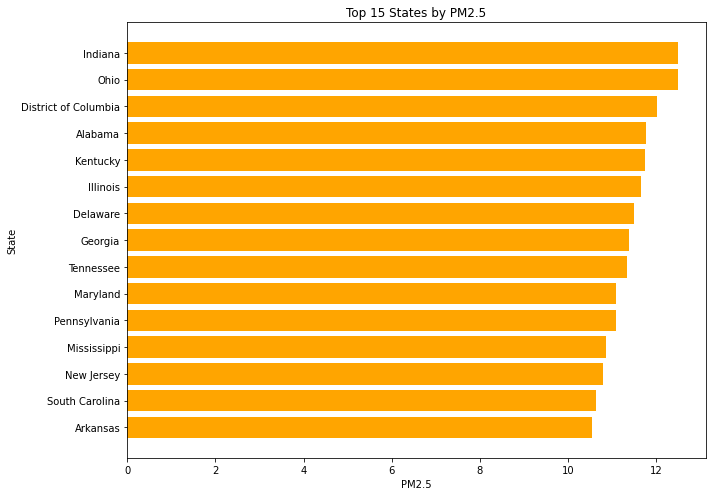

In [102]:
# Sorting by 'Lung cancer Mortality' in descending order and selecting the top 10
top_states = air_rate_by_state.sort_values(by='pm25', ascending=False).head(15)

# Plotting the horizontal bar graph
plt.figure(figsize=(10, 7))
plt.barh(top_states['state_name'], top_states['pm25'], color='orange')
plt.ylabel('State')
plt.xlabel('PM2.5')
plt.title('Top 15 States by PM2.5')
plt.tight_layout()
plt.gca().invert_yaxis()  # This will make the state with the highest mortality appear at the top
plt.show()

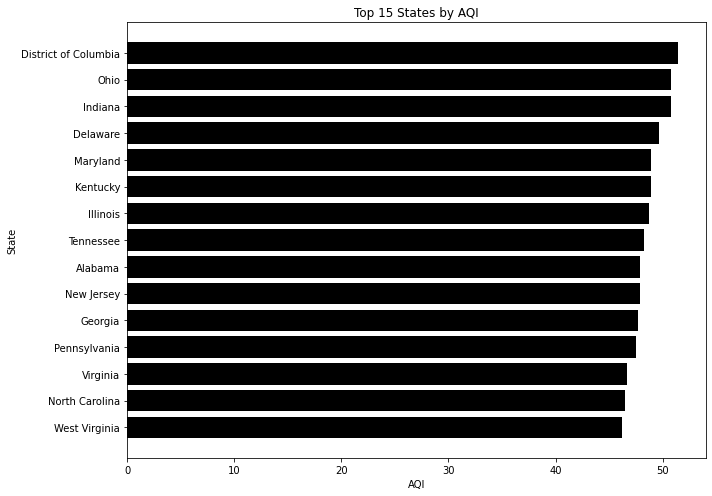

In [100]:
# Sorting by 'Lung cancer Mortality' in descending order and selecting the top 10
top_states = air_rate_by_state.sort_values(by='AQI', ascending=False).head(15)

# Plotting the horizontal bar graph
plt.figure(figsize=(10, 7))
plt.barh(top_states['state_name'], top_states['AQI'], color='black')
plt.ylabel('State')
plt.xlabel('AQI')
plt.title('Top 15 States by AQI')
plt.tight_layout()
plt.gca().invert_yaxis()  # This will make the state with the highest mortality appear at the top
plt.show()

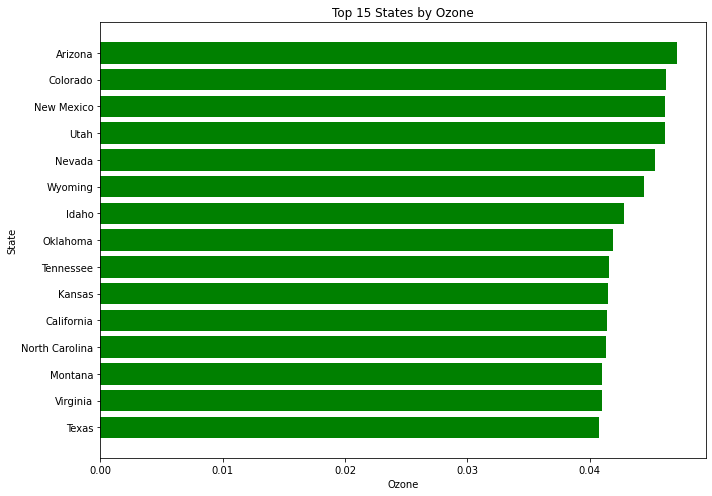

In [97]:
# Sorting by 'Lung cancer Mortality' in descending order and selecting the top 10
top_states = air_rate_by_state.sort_values(by='ozone', ascending=False).head(15)

# Plotting the horizontal bar graph
plt.figure(figsize=(10, 7))
plt.barh(top_states['state_name'], top_states['ozone'], color='green')
plt.ylabel('State')
plt.xlabel('Ozone')
plt.title('Top 15 States by Ozone')
plt.tight_layout()
plt.gca().invert_yaxis()  # This will make the state with the highest mortality appear at the top
plt.show()

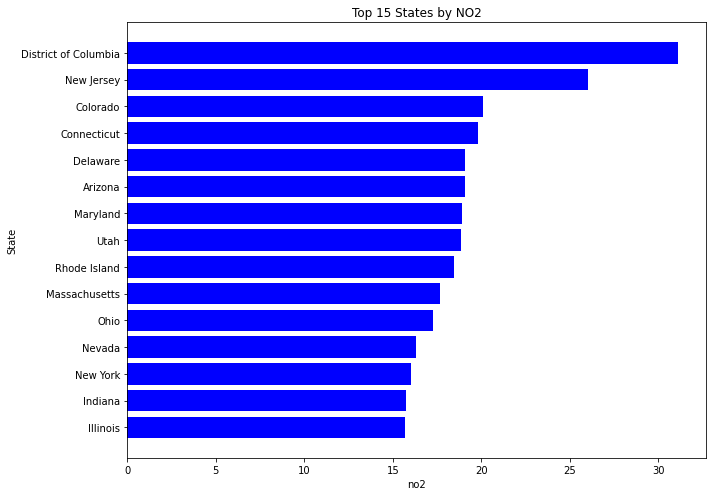

In [103]:
# Sorting by 'Lung cancer Mortality' in descending order and selecting the top 10
top_states = air_rate_by_state.sort_values(by='no2', ascending=False).head(15)

# Plotting the horizontal bar graph
plt.figure(figsize=(10, 7))
plt.barh(top_states['state_name'], top_states['no2'], color='blue')
plt.ylabel('State')
plt.xlabel('no2')
plt.title('Top 15 States by NO2')
plt.tight_layout()
plt.gca().invert_yaxis()  # This will make the state with the highest mortality appear at the top
plt.show()

### Use pairwise correlation

In [131]:
air_rate_county_year.head()

,year,fips,statefips,deaths,pop,lung_cancer_mortality_rate,pm25,ozone,no2,AQI,state_name,state
0,2000,01001,01,14,40880,34.246575,17.533301,0.043600,15.392933,62.601136,Alabama,AL
1,2000,01003,01,92,123900,74.253430,13.566472,0.044790,19.748021,55.220764,Alabama,AL
2,2000,01005,01,20,26486,75.511591,15.311938,0.044848,11.185861,58.568098,Alabama,AL
3,2000,01007,01,12,17222,69.678318,17.390619,0.042250,11.095410,62.047892,Alabama,AL
4,2000,01009,01,23,45644,50.389975,17.967091,0.043877,15.909690,63.929598,Alabama,AL


In [132]:
air_rate_county_year_normalized = normalizeColumn(air_rate_county_year, 'lung_cancer_mortality_rate')
air_rate_county_year_normalized = normalizeColumn(air_rate_county_year_normalized, 'pm25')
air_rate_county_year_normalized = normalizeColumn(air_rate_county_year_normalized, 'ozone')
air_rate_county_year_normalized = normalizeColumn(air_rate_county_year_normalized, 'no2')
air_rate_county_year_normalized = normalizeColumn(air_rate_county_year_normalized, 'AQI')
air_rate_county_year_normalized.head()

,year,fips,statefips,deaths,pop,lung_cancer_mortality_rate,pm25,ozone,no2,AQI,state_name,state,lung_cancer_mortality_rate_normalized,pm25_normalized,ozone_normalized,no2_normalized,AQI_normalized
0,2000,01001,01,14,40880,34.246575,17.533301,0.043600,15.392933,62.601136,Alabama,AL,5.919376,82.793874,64.937567,17.374627,64.649362
1,2000,01003,01,92,123900,74.253430,13.566472,0.044790,19.748021,55.220764,Alabama,AL,13.180138,62.031698,69.320386,22.650275,51.347605
2,2000,01005,01,20,26486,75.511591,15.311938,0.044848,11.185861,58.568098,Alabama,AL,13.408479,71.167378,69.534220,12.278282,57.380556
3,2000,01007,01,12,17222,69.678318,17.390619,0.042250,11.095410,62.047892,Alabama,AL,12.349810,82.047087,59.968212,12.168713,63.652242
4,2000,01009,01,23,45644,50.389975,17.967091,0.043877,15.909690,63.929598,Alabama,AL,8.849209,85.064309,65.956180,18.000615,67.043671


In [133]:
def correlation_matrix(df):
    """
    A function to calculate and plot
    correlation matrix of a DataFrame.
    """
    # Create the matrix
    matrix = df.corr()
    
    # Create cmap
    cmap = sn.diverging_palette(250, 15, s=75, l=40,
                             n=9, center="light", as_cmap=True)
    # Create a mask
    mask = np.triu(np.ones_like(matrix, dtype=bool))
    
    # Make figsize bigger
    fig, ax = plt.subplots(figsize=(16,12))
    
    # Plot the matrix
    _ = sn.heatmap(matrix, mask=mask, center=0, annot=True,
             fmt='.2f', square=True, cmap=cmap, ax=ax)

In [137]:
air_rate_normalized = air_rate_county_year_normalized[['fips', 'lung_cancer_mortality_rate_normalized','pm25_normalized', 'ozone_normalized', 'no2_normalized', 'AQI_normalized']]
air_rate_normalized                                   

,fips,lung_cancer_mortality_rate_normalized,pm25_normalized,ozone_normalized,no2_normalized,AQI_normalized
0,01001,5.919376,82.793874,64.937567,17.374627,64.649362
1,01003,13.180138,62.031698,69.320386,22.650275,51.347605
2,01005,13.408479,71.167378,69.534220,12.278282,57.380556
3,01007,12.349810,82.047087,59.968212,12.168713,63.652242
4,01009,8.849209,85.064309,65.956180,18.000615,67.043671
...,...,...,...,...,...,...
50381,56037,3.209271,8.897902,67.174845,8.252884,25.325751
50382,56039,0.523802,6.145127,66.589358,3.219259,24.789354
50383,56041,2.503192,17.409167,70.657787,8.529641,26.696000
50384,56043,2.076738,4.946080,59.594078,2.733287,21.530350


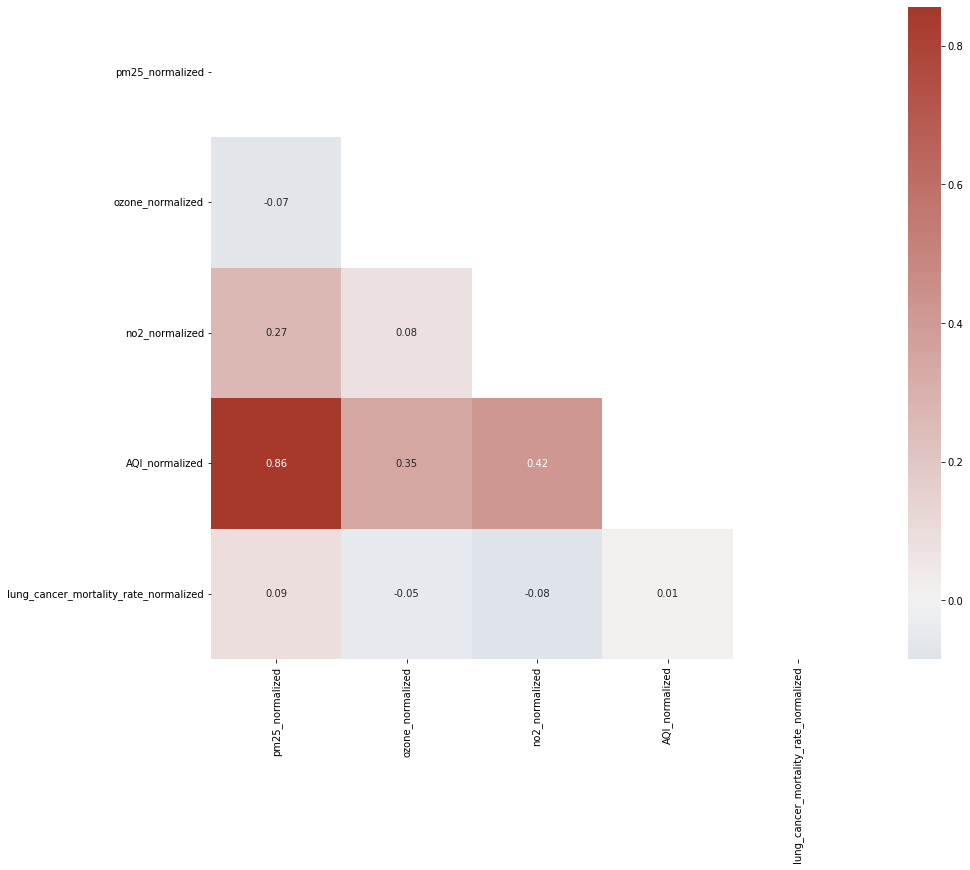

In [139]:
#air_county = air_rate_county_year.drop(['deaths', 'pop', 'year'], axis =1)
air_county = air_rate_normalized[['pm25_normalized', 'ozone_normalized', 'no2_normalized', 'AQI_normalized', 'lung_cancer_mortality_rate_normalized']]
correlation_matrix(air_county)

In [140]:
air_county

,pm25_normalized,ozone_normalized,no2_normalized,AQI_normalized,lung_cancer_mortality_rate_normalized
0,82.793874,64.937567,17.374627,64.649362,5.919376
1,62.031698,69.320386,22.650275,51.347605,13.180138
2,71.167378,69.534220,12.278282,57.380556,13.408479
3,82.047087,59.968212,12.168713,63.652242,12.349810
4,85.064309,65.956180,18.000615,67.043671,8.849209
...,...,...,...,...,...
50381,8.897902,67.174845,8.252884,25.325751,3.209271
50382,6.145127,66.589358,3.219259,24.789354,0.523802
50383,17.409167,70.657787,8.529641,26.696000,2.503192
50384,4.946080,59.594078,2.733287,21.530350,2.076738


In [142]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Setting up the data
X = air_county[['pm25_normalized']]
y = air_county['lung_cancer_mortality_rate_normalized']

# Creating the linear regression model
model = LinearRegression().fit(X, y)

# Predictions
y_pred = model.predict(X)

# Output the results
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean squared error (MSE): %.2f" % mean_squared_error(y, y_pred))
print("Coefficient of determination (R^2): %.2f" % r2_score(y, y_pred))

Coefficients: [0.03221308]
Intercept: 9.844318061597711
Mean squared error (MSE): 33.29
Coefficient of determination (R^2): 0.01


In [143]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [144]:
air_county['lung_cancer_mortality_rate_normalized'].describe()

count    50386.000000
mean        11.142401
std          5.792138
min          0.000000
25%          7.285165
50%         10.397357
75%         13.998083
max        100.000000
Name: lung_cancer_mortality_rate_normalized, dtype: float64

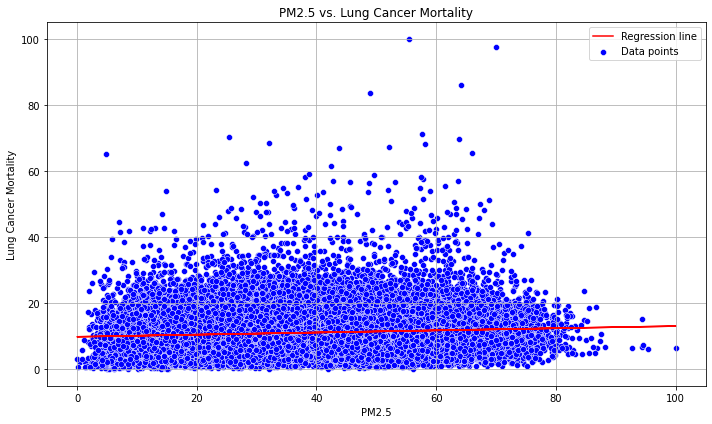

In [145]:
# Plotting the data and the regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pm25_normalized', y= 'lung_cancer_mortality_rate_normalized', data=air_county, color='blue', label='Data points')
plt.plot(X, y_pred, color='red', label='Regression line')
plt.title('PM2.5 vs. Lung Cancer Mortality')
plt.xlabel('PM2.5')
plt.ylabel('Lung Cancer Mortality')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [146]:
# Setting up the data
X = air_county[['ozone_normalized']]
y = air_county['lung_cancer_mortality_rate_normalized']

# Creating the linear regression model
model = LinearRegression().fit(X, y)

# Predictions
y_pred = model.predict(X)

# Output the results
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean squared error (MSE): %.2f" % mean_squared_error(y, y_pred))
print("Coefficient of determination (R^2): %.2f" % r2_score(y, y_pred))

Coefficients: [-0.02457693]
Intercept: 12.411728179002496
Mean squared error (MSE): 33.47
Coefficient of determination (R^2): 0.00


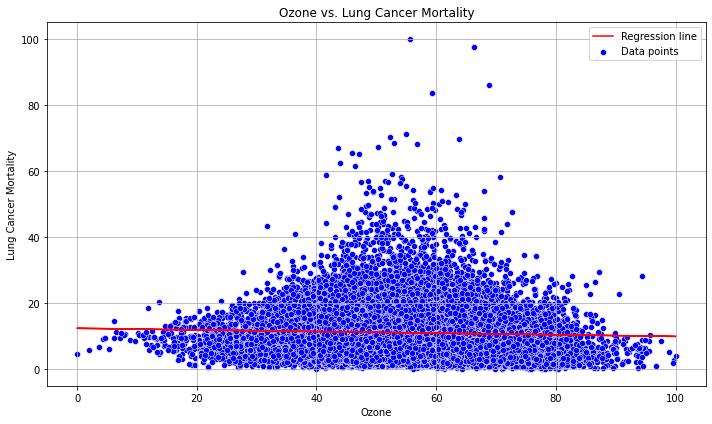

In [147]:
# Plotting the data and the regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ozone_normalized', y= 'lung_cancer_mortality_rate_normalized', data=air_county, color='blue', label='Data points')
plt.plot(X, y_pred, color='red', label='Regression line')
plt.title('Ozone vs. Lung Cancer Mortality')
plt.xlabel('Ozone')
plt.ylabel('Lung Cancer Mortality')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [148]:
# Setting up the data
X = air_county[['AQI_normalized']]
y = air_county['lung_cancer_mortality_rate_normalized']

# Creating the linear regression model
model = LinearRegression().fit(X, y)

# Predictions
y_pred = model.predict(X)

# Output the results
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean squared error (MSE): %.2f" % mean_squared_error(y, y_pred))
print("Coefficient of determination (R^2): %.2f" % r2_score(y, y_pred))

Coefficients: [0.00761187]
Intercept: 10.891191442854518
Mean squared error (MSE): 33.54
Coefficient of determination (R^2): 0.00


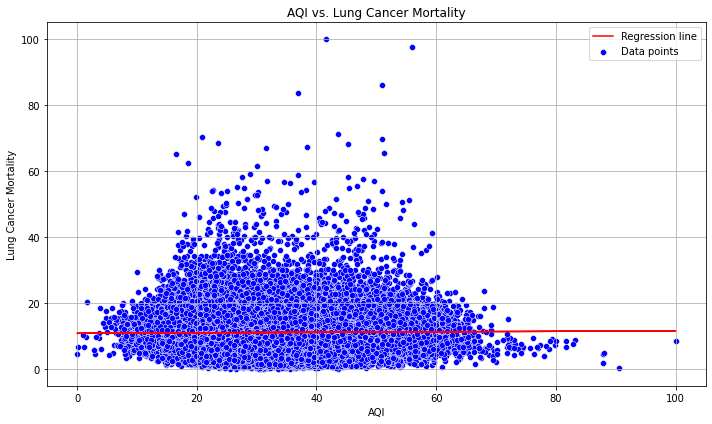

In [149]:
# Plotting the data and the regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AQI_normalized', y= 'lung_cancer_mortality_rate_normalized', data=air_county, color='blue', label='Data points')
plt.plot(X, y_pred, color='red', label='Regression line')
plt.title('AQI vs. Lung Cancer Mortality')
plt.xlabel('AQI')
plt.ylabel('Lung Cancer Mortality')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [151]:
# Setting up the data
X = air_county[['no2_normalized']]
y = air_county['lung_cancer_mortality_rate_normalized']

# Creating the linear regression model
model = LinearRegression().fit(X, y)

# Predictions
y_pred = model.predict(X)

# Output the results
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean squared error (MSE): %.2f" % mean_squared_error(y, y_pred))
print("Coefficient of determination (R^2): %.2f" % r2_score(y, y_pred))

Coefficients: [-0.06624843]
Intercept: 12.078727002709812
Mean squared error (MSE): 33.31
Coefficient of determination (R^2): 0.01


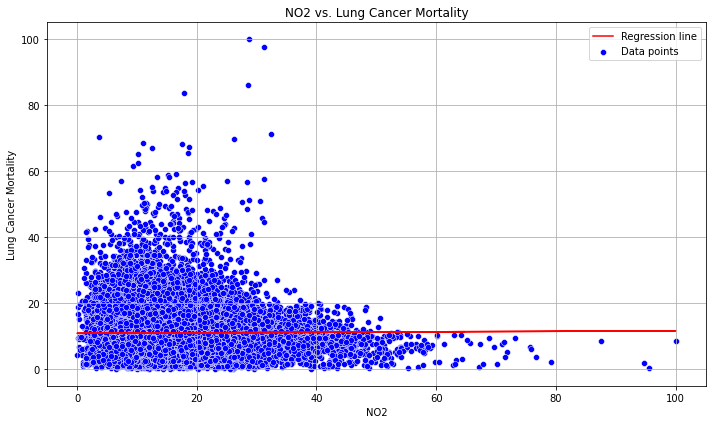

In [150]:
# Plotting the data and the regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='no2_normalized', y= 'lung_cancer_mortality_rate_normalized', data=air_county, color='blue', label='Data points')
plt.plot(X, y_pred, color='red', label='Regression line')
plt.title('NO2 vs. Lung Cancer Mortality')
plt.xlabel('NO2')
plt.ylabel('Lung Cancer Mortality')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()